# Итоговая работа

Современные методы анализа данных

Брылёва Екатерина, МБД191



*Цель работы:*  создание модели, предсказывающей вероятность возникновения интереса к другому человеку для построения отношений, и выявляющей совместимость между двумя людьми в соответствии с их интересами, возрастами, расами и личными характеристиками, такими как привлекательность, чувство юмора и амбициозность, интеллект, искренность.

*Ценность прогностической модели* состоит в том, что ее можно использовать в компаниях, специализирующихся на свиданиях и брачных мероприятиях.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10
import numpy as np

In [ ]:
import seaborn as sns # красивые графики
sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
dataset=pd.read_csv('gdrive/My Drive/Colab Notebooks/speeddating_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1.   Описание и обработка данных






Данные были получены от участников экспериментальных так называемых "быстрых свиданий".

Быстрое свидание или speed dating - это четырехминутное «первое свидание» с другим участником противоположного пола. В конце встречи участников спросили, хотели бы они встретиться снова. Кроме того, их попросили заполнить анкеты с личными данными и оценить свидание по шести признакам: привлекательность, искренность, интеллект, веселье, амбиции и общие интересы. Личная информация включает в себя такие характеристики, как демография, поведение на свидании, самовосприятие по ключевым признакам, мнение о том, что является ценным в браке и образе жизни.

In [ ]:
dataset.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,...,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,0,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,35,20,20,20,0,5,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6,8,8,8,8,6,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15,...,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,0,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,60,0,0,40,0,0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,10,7,7,5,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15,...,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3,2,4,[0-4],[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,0,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,[2-5],[2-5],Law,19,18,19,18,14,12,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10,10,10,10,10,10,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15,...,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,0,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,30,5,15,40,5,5,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,9,8,9,8,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,...,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.61,[0.33-1],3,2,4,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,0,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,[2-5],[2-5],Law,30,10,20,10,10,20,[21-100],[0-15],[16-20],[0-15],[0-15],[16-20],8,7,9,6,9,7,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,...,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.21,[0-0.33],3,2,4,[0-4],[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


##Первичная чистка данных

Всего 8378 наблюдений (человек): 50% из них мужчины, 50% - женщины. 
Ниже представлено описание наиболее **интересных** из 123 переменных. Сократили число столбцов до 45. 


**gender**: *female or male*

**age**: *age of the respondent*

**age_o**: *age of the partner*

**diff_age**: *difference in age of two dating people*

**race**: *race of the respondent*

**race_o**: *race of the partner* 

**samerace**: *1 if race is the same, 0 - opposite*

**importance_samerace**: *is the same race important? Scale from 0 to 10*

**importance_samereligion**: *is the same religion important? Scale from 0 to 10* 

**field**: *in which sphere the respondent works? 221 spheres*

**pref_o_attractive**: *how important does partner rate attractiveness? Scale from 0 to 100* 

**pref_o_sincere**: *how important does partner rate sincerity? Scale from 0 to 100* 

**pref_o_intelligence**: *how important does partner rate intelligence? Scale from 0 to 100*  

**pref_o_funny**: *how important does partner rate being funny? Scale from 0 to 100*

**pref_o_ambitious**: *how important does partner rate being ambitious? Scale from 0 to 100*  

**pref_o_shared_interests**: *how important does partner rate having shared interests? Scale from 0 to 100* 

**attractive_o**: *how partner rated my attractiveness? Scale from 0 to 10*  

**sinsere_o**: *how partner rated my sincerity? Scale from 0 to 10*  

**intelligence_o**: *how partner rated my intelligence? Scale from 0 to 10*  

**funny_o**: *how partner rated me being fun? Scale from 0 to 10*  

**ambitous_o**: *how partner rated me being ambitious? Scale from 0 to 10* 

**shared_interests_o**: *how partner rated our shared interests? Scale from 0 to 10*  

**attractive_important**: *how important do you rate attractiveness? Scale from 0 to 100*  

**sincere_important**: *how important do you sincerity? Scale from 0 to 100*  

**intelligence_important**: *how important do you rate intelligence? Scale from 0 to 100*  

**funny_important**: *how important do you rate being funny? Scale from 0 to 100*  

**ambtition_important**: *how important do you rate being ambitious? Scale from 0 to 100*  

**shared_interests_important**: *how important do you rate having the shared interests? Scale from 0 to 100*  

**attractive**: *self-rate, scale from 0 to 10*  

**sincere**: *self-rate, scale from 0 to 10*  

**intelligence**: *self-rate, scale from 0 to 10*  

**funny**: *self-rate, scale from 0 to 10*  

**ambition**: *self-rate, scale from 0 to 10*  

**attractive_partner**: *rate your partner, scale from 0 to 10*  

**sincere_partner**: *rate your partner, scale from 0 to 10* 

**intelligence_partner**: *rate your partner, scale from 0 to 10* 

**funny_partner**: *rate your partner, scale from 0 to 10*

**ambition_partner**: *rate your partner, scale from 0 to 10* 

**interests_correlate**: *correlation of the interests* 

**like**: *did you like your partner? Scale from 0 to 10*  

**guess_prob_liked**: *probability that partner liked you, scale from 0 to 10* 

**met**: *how many times you met before?* 

**decision**: *dummy: 1 if you want to meet again, 0 - opposite* 

**decision_o**: *dummy: 1 if partner wants to meet again, 0 - opposite* 

**match**: *dummy: 1 if the couple match, 0 - opposit*

In [ ]:
dataset.describe(include='all')

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,...,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
count,8378.00000,8378.000000,8378,8378,8378,8378.000000,8378,8378,8378,8378.000000,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,...,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378.000000,8378.000000,8378.000000
unique,NaN,NaN,2,31,25,NaN,4,6,6,NaN,18,16,3,3,260,102,85,72,78,88,86,3,3,3,3,3,3,19,15,18,18,16,16,3,3,3,3,3,3,102,...,17,18,16,19,16,17,17,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,250,3,17,19,18,3,3,3,19,20,3,3,8,NaN,NaN,NaN
top,NaN,NaN,male,27,27,NaN,[2-3],European/Caucasian-American,European/Caucasian-American,NaN,1,1,[2-5],[0-1],Business,20,20,20,20,10,10,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6,8,8,7,7,5,[6-8],[6-8],[6-8],[6-8],[6-8],[0-5],20,...,6,7,8,7,10,7,1,[6-8],[0-5],[6-8],[6-8],[6-8],[6-8],[0-5],[0-5],[6-8],[6-8],[0-5],[6-8],[6-8],[6-8],[6-8],[0-5],[0-5],?,[0-0.33],5,?,2,[5-6],[0-3],[0-2],7,5,[6-8],[5-6],0,NaN,NaN,NaN
freq,NaN,NaN,4194,1037,1059,NaN,2406,4727,4722,NaN,2754,2944,3104,3111,521,1613,2184,2653,2164,1937,2001,3010,3820,4272,3870,6680,6085,1655,2045,2198,1657,1679,1462,4537,5192,5379,4645,4613,4690,1627,...,1359,1564,1967,1487,1723,1154,1483,3239,5219,3718,4147,4299,3994,3751,6109,3831,3659,4158,3906,4152,4179,3941,3975,5444,158,3063,2001,6578,1695,4036,7346,4514,1816,1799,4827,3199,7644,NaN,NaN,NaN
mean,0.87491,11.350919,NaN,NaN,NaN,4.185605,NaN,NaN,NaN,0.395799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.419909,0.419551,0.164717
std,0.33084,5.995903,NaN,NaN,NaN,4.596171,NaN,NaN,NaN,0.489051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493573,0.493515,0.370947
min,0.00000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,1.00000,7.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00

Из описательной статистики, приведенной выше, можно сделать некоторые выводы о данных. Во-первых, средний возраст участников 26 лет, средняя разница в возрасте партнеров составляет 4 года. Партнеры обычно не представляли одну и ту же расу, и одна и та же раса или религия не были столь важны для респондентов.

Что касается предпочтений партнера, лишь немногие из них считают, что привлекательность важна на 100%, в то время как чувство юмора, искренность, амбиции и интеллект важны максимум на 50%. Самооценка привлекательности, чувства юмора и других характеристик людей в среднем выше, чем у партнеров.

Наконец, в среднем опрошенным понравился свой партнер только на 60%, однако были те, кому партнер понравился полностью по всем качествам (100%). Большинство участников не встречались раньше, и более половины людей решили больше не встречаться. К сожалению, меньше половины участников подошли друг другу в результате эксперимента.

##Чистка данных: продолжение

Было решено исключить переменные, которые, как предполагается, не влияют на вероятность совместимости двух людей. Например, я не верю, что самооценка привлекательности, интеллекта и т. д. может существенно повлиять на вероятность совместимости, поскольку речь идет о том, как вы оцениваете своего партнера и как партнер оценивает вас. Важность некоторых характеристик для респондента или партнера также не учитывается, так как это мало говорит о возможном совпадении. Кроме того, кажется необоснованным включать такие переменные, как возраст или раса, поскольку мы включили разницу в возрасте и фиктивную переменнуюдля совпадения по расе. Таким образом, существенными для модели являются 16 переменных.


**d_age**: *разница в возрасте*

**samerace**: *1, если раса одинаковая, 0 - в противном случае*

**attractive_o**: *Как партнер оценивает мою привлекательность? [0; 10]*

**sinsere_o**: *Как партнер оценивает мою искренность? [0; 10]*

**intelligence_o**: *Как партнер оценивает мой ум? [0; 10]*

**funny_o**: *Как партнер оценивает мое чувство юмора? [0; 10]* 

**ambitous_o**: *Как партнер оценивает мою амбициознось? [0; 10]* 

**shared_interests_o**: *Разделяю ли я интересы партнера? [0; 10]*

**attractive_partner**: *привлекательность партнера, [0; 10]*  

**sincere_partner**: *искренность партнера, [0; 10]* 

**intelligence_partner**: *ум партнера, [0; 10]* 

**funny_partner**: *чувство юмора партнера, [0; 10]* 

**ambition_partner**: *амбициозность партнера, [0; 10]*  

**shared_interests_partner**: *Разделяет ли партнер мои интересы? [0; 10]*

**interests_correlate**: *общие интересы* 

**like**: *Насколько мне понравился партнер? [0; 10]*  






In [ ]:
#уберем лишние столбцы
new_data = dataset.drop(['has_null',	'wave',	'gender',	'age',	'age_o',	'd_d_age',	'race',	'race_o',	'importance_same_race',	'importance_same_religion',	'd_importance_same_race',	'd_importance_same_religion',	'field',	'pref_o_attractive',	'pref_o_sincere',	'pref_o_intelligence',	'pref_o_funny',	'pref_o_ambitious',	'pref_o_shared_interests',	'd_pref_o_attractive',	'd_pref_o_sincere',	'd_pref_o_intelligence',	'd_pref_o_ambitious',	'd_pref_o_shared_interests',	'd_attractive_o',	'd_sinsere_o',	'd_intelligence_o',	'd_funny_o',	'd_ambitous_o',	'd_shared_interests_o',	'attractive_important',	'sincere_important',	'intellicence_important',	'funny_important',	'ambtition_important',	'shared_interests_important',	'd_attractive_important',	'd_sincere_important',	'd_intellicence_important', 'clubbing',	'reading',	'tv',	'theater',	'movies',	'concerts',	'music',	'shopping',	'yoga',	'd_sports',	'd_tvsports',	'd_exercise',	'd_dining',	'd_museums',	'd_art',	'd_hiking',	'd_gaming',	'd_clubbing',	'd_reading',	'd_tv',	'd_theater',	'd_movies',	'd_concerts',	'd_music',	'd_shopping',	'd_yoga',	'd_interests_correlate',	'expected_happy_with_sd_people',	'expected_num_interested_in_me',	'expected_num_matches',	'd_expected_happy_with_sd_people',	'd_expected_num_interested_in_me',	'd_expected_num_matches',	'guess_prob_liked',	'd_like',	'd_guess_prob_liked',	'met',	'decision',	'decision_o','d_pref_o_funny',	'd_funny_important',	'd_ambtition_important',	'd_shared_interests_important',	'attractive',	'sincere',	'intelligence',	'funny',	'ambition',	'd_attractive',	'd_sincere',	'd_intelligence',	'd_funny',	'd_ambition',	'd_attractive_partner',	'd_sincere_partner',	'd_intelligence_partner',	'd_funny_partner',	'd_ambition_partner',	'd_shared_interests_partner',	'sports',	'tvsports',	'exercise',	'dining',	'museums',	'art',	'hiking',	'gaming'], axis = 1)

In [ ]:
new_data.head()

,d_age,samerace,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,like,match
0,6,0,6,8,8,8,8,6,6,9,7,7,6,5,0.14,7,0
1,1,0,7,8,10,7,7,5,7,8,7,8,5,6,0.54,7,0
2,1,1,10,10,10,10,10,10,5,8,9,8,5,7,0.16,7,1
3,2,0,7,8,9,8,9,8,7,6,8,7,6,8,0.61,7,1
4,3,0,8,7,9,6,9,7,5,6,7,7,6,6,0.21,6,1


##Чистка данных: пропущенные переменные

Пропущенные значения представляют собой знак "?"

In [ ]:
new_data.isna().sum()[new_data.isna().sum()>0]

Series([], dtype: int64)

Посмотрим по разным параметрам:

In [ ]:
new_data.samerace.value_counts()
#нет пропущенных значений

0    5062
1    3316
Name: samerace, dtype: int64

In [ ]:
new_data.match.value_counts()
#нет пропущенных значений

0    6998
1    1380
Name: match, dtype: int64

In [ ]:
new_data.d_age.value_counts()
#нет пропущенных значений

1     1548
2     1286
3     1120
4      970
5      758
0      679
6      588
7      416
8      268
9      186
10     132
11      72
12      38
22      30
14      30
13      26
30      22
29      20
27      18
25      16
21      16
17      14
24      14
23      14
15      12
26      12
28      12
16      12
20      11
34      10
19       9
32       8
18       5
36       4
37       2
Name: d_age, dtype: int64

In [ ]:
new_data.like.value_counts()
#количество пропущенных значений: 240

7      1816
6      1709
5      1319
8      1274
4       645
9       412
3       396
?       240
2       223
10      182
1       110
6.5      20
8.5       9
0         8
7.5       6
9.5       3
4.5       3
5.5       2
9.7       1
Name: like, dtype: int64

In [ ]:
new_data.shared_interests_partner.value_counts()
#количество пропущенных значений: 1067

5      1465
6      1248
7      1150
?      1067
4       783
8       771
3       588
2       485
9       317
1       239
10      197
0        59
7.5       4
6.5       2
8.5       2
5.5       1
Name: shared_interests_partner, dtype: int64

Заметим, что по некоторым параметрам есть внушительное количество пропущенных значений. Но так как все переменные, кроме возраста и расы(где пропущенных значений нет) представляют собой оценку респондентов по числовой шкале от худшего к лучшему, можем предположить, что, если человек не дал ответа, его оценка приравнивается к 0. Заменим пропущенные значения в датасете на 0. Данное преобразование незначительно влияет на оценку.

In [ ]:
new_data=new_data.replace({'?': 0 })

##Посмотрим на графики распределения:


> На каждом графике расположим  по 4 гистограммы.



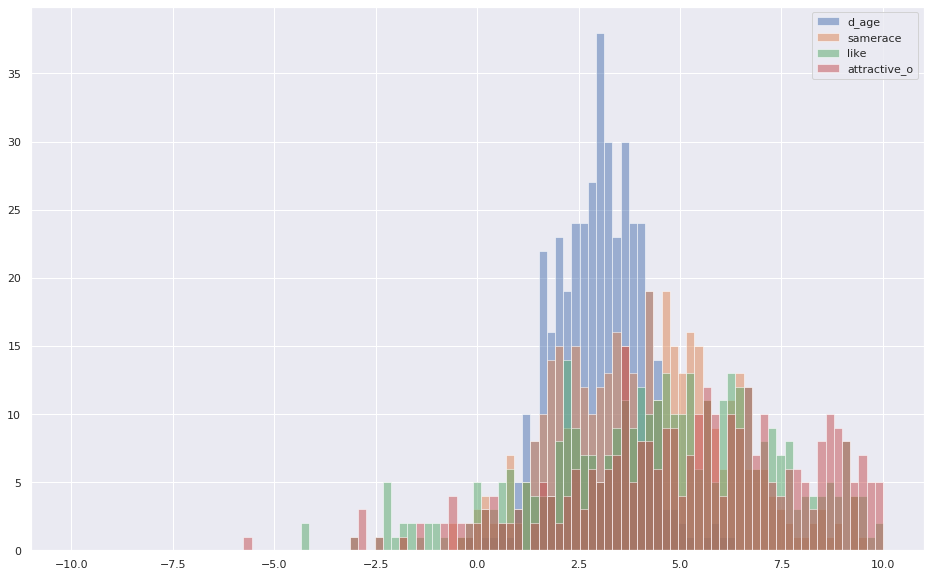

In [ ]:
import random 
import numpy 
from matplotlib import pyplot 

x = [random.gauss(3,1) for d_age in range(400)] 
y = [random.gauss(4,2) for samerace in range(400)] 
z = [random.gauss(5,3) for like in range(400)]
m = [random.gauss(6,4) for attractive_o in range(400)]

bins = numpy.linspace(-10, 10, 100) 

pyplot.hist(x, bins, alpha=0.5, label='d_age') 
pyplot.hist(y, bins, alpha=0.5, label='samerace') 
pyplot.hist(z, bins, alpha=0.5, label='like')
pyplot.hist(m, bins, alpha=0.5, label='attractive_o')
pyplot.legend(loc='upper right') 
pyplot.show()
 


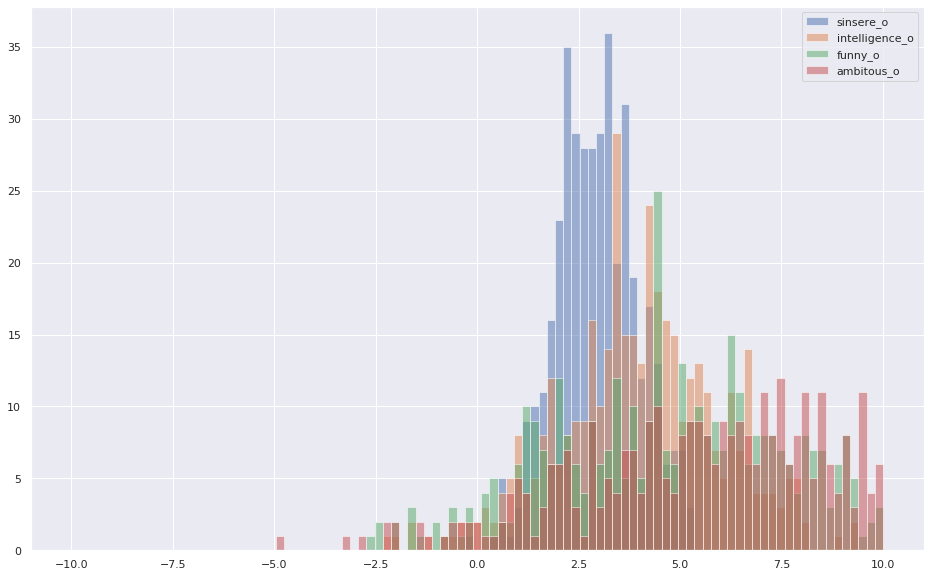

In [ ]:
import random 
import numpy 
from matplotlib import pyplot 

x = [random.gauss(3,1) for sinsere_o in range(400)] 
y = [random.gauss(4,2) for intelligence_o in range(400)] 
z = [random.gauss(5,3) for funny_o in range(400)]
m = [random.gauss(6,4) for ambitous_o in range(400)]

bins = numpy.linspace(-10, 10, 100) 

pyplot.hist(x, bins, alpha=0.5, label='sinsere_o') 
pyplot.hist(y, bins, alpha=0.5, label='intelligence_o') 
pyplot.hist(z, bins, alpha=0.5, label='funny_o')
pyplot.hist(m, bins, alpha=0.5, label='ambitous_o')
pyplot.legend(loc='upper right') 
pyplot.show()
 

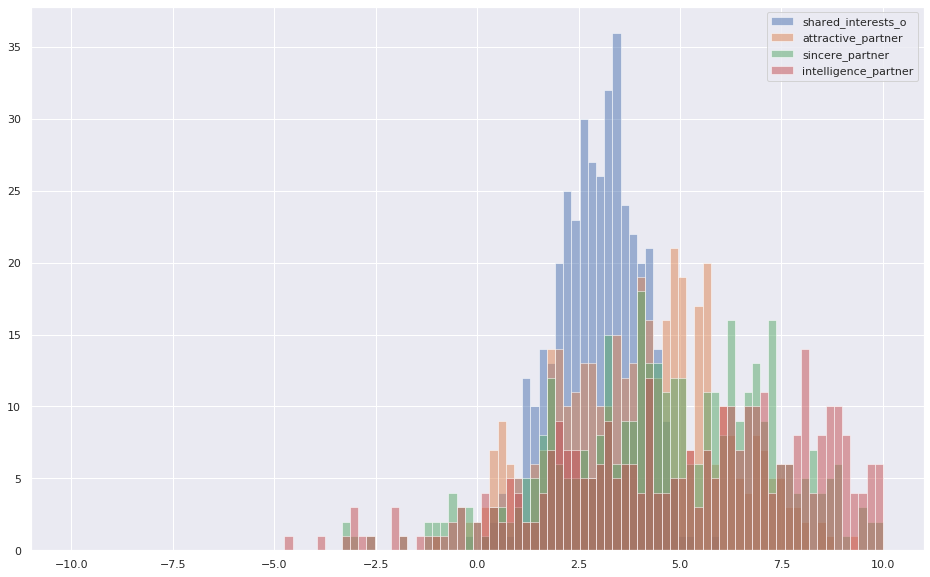

In [ ]:
import random 
import numpy 
from matplotlib import pyplot 

x = [random.gauss(3,1) for shared_interests_o in range(400)] 
y = [random.gauss(4,2) for attractive_partner in range(400)] 
z = [random.gauss(5,3) for sincere_partner in range(400)]
m = [random.gauss(6,4) for intelligence_partner in range(400)]

bins = numpy.linspace(-10, 10, 100) 

pyplot.hist(x, bins, alpha=0.5, label='shared_interests_o') 
pyplot.hist(y, bins, alpha=0.5, label='attractive_partner') 
pyplot.hist(z, bins, alpha=0.5, label='sincere_partner')
pyplot.hist(m, bins, alpha=0.5, label='intelligence_partner')
pyplot.legend(loc='upper right') 
pyplot.show()

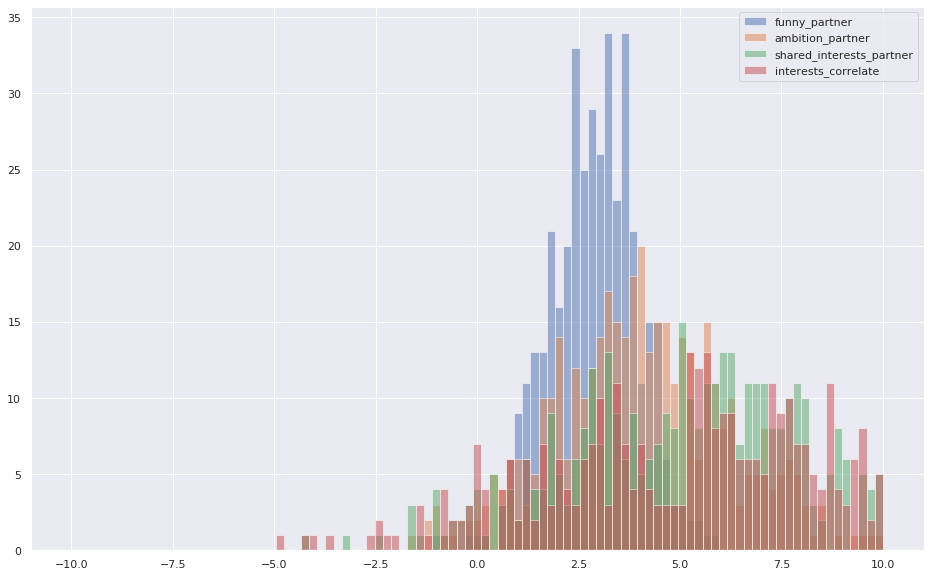

In [ ]:
import random 
import numpy 
from matplotlib import pyplot 
				
x = [random.gauss(3,1) for funny_partner in range(400)] 
y = [random.gauss(4,2) for ambition_partner in range(400)] 
z = [random.gauss(5,3) for shared_interests_partner in range(400)]
m = [random.gauss(6,4) for interests_correlate in range(400)]

bins = numpy.linspace(-10, 10, 100) 

pyplot.hist(x, bins, alpha=0.5, label='funny_partner') 
pyplot.hist(y, bins, alpha=0.5, label='ambition_partner') 
pyplot.hist(z, bins, alpha=0.5, label='shared_interests_partner')
pyplot.hist(m, bins, alpha=0.5, label='interests_correlate')
pyplot.legend(loc='upper right') 
pyplot.show()

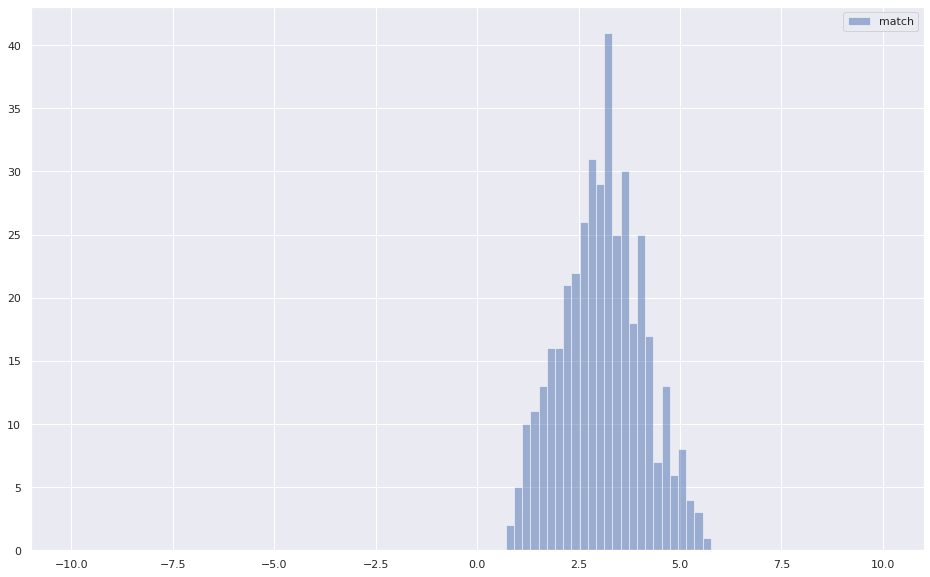

In [ ]:
#зависимая переменная
import random 
import numpy 
from matplotlib import pyplot 
				
x = [random.gauss(3,1) for match in range(400)] 

bins = numpy.linspace(-10, 10, 100) 

pyplot.hist(x, bins, alpha=0.5, label='match') 

pyplot.legend(loc='upper right') 
pyplot.show()

Все переменные имеют распределение близкое к нормальному.

# 2.   Гипотезы исследования

Прежде чем строить модели и сделать некоторые выводы, выдвинем несколько предложений:

*1. Разница в возрасте отрицательно влияет на вероятность совместимости: чем больше разница в возрасте, тем меньше вероятность совпадения людей.*

*2. Чем выше корреляция в интересах, тем выше вероятность совместимости.*

*3. Оценки, данные респондентом о своем партнере, положительно влияют на вероятность совпадения: чем выше показатели привлекательности, чувства юмора, интеллекта, искренности, амбиций и общих интересов, тем выше вероятность того, что хотя бы один человек из пары захочет встретиться снова.*

*4. Оценки, выставленные респонденту его партнером, положительно влияют на вероятность совпадения, поскольку чем выше рейтинг партнера, тем больше вероятность совместимости.*

*5. Наконец, если респондент написал, что ему / ей понравился партнер, вероятность того, что у них будет совместимость, увеличивается на 50% => положительное влияние.*

# 3. Моделирование

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

Прежде всего, разделим данные на две выборки: тестовую и обучающую.  Обучающая выборка необходима для построения модели, которая «понимает» взаимосвязи, а тестовая выборка помогает нам оценить, как обученная модель работает с новыми данными. 80% наблюдений направим на обучение, а оставшиеся 20% оставим для проверки точности модели.
 

In [ ]:
y = new_data['match'].values

In [ ]:
x = new_data.iloc[:, 0:16]
print(x)

      d_age  samerace  ... interests_correlate like
0         6         0  ...                0.14    7
1         1         0  ...                0.54    7
2         1         1  ...                0.16    7
3         2         0  ...                0.61    7
4         3         0  ...                0.21    6
...     ...       ...  ...                 ...  ...
8373      1         0  ...                0.64    2
8374      1         0  ...                0.71    4
8375      4         0  ...               -0.46    6
8376      3         0  ...                0.62    5
8377      3         0  ...                0.01    4

[8378 rows x 16 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/5, random_state = 0)

*   ##  *Построение линейной регрессии*




In [ ]:
regdate = LinearRegression()
regdate.fit(x_train,y_train)
regdate.intercept_, regdate.coef_

(-0.31924992520101025,
 array([-0.00143925, -0.01068177,  0.0293032 , -0.00666377, -0.00202789,
         0.01898513, -0.00911524,  0.01179284,  0.01743949, -0.00952441,
        -0.00317028,  0.01618834, -0.00844178,  0.00696713,  0.02142086,
         0.02716452]))

In [ ]:
#посмотрим на показатель R^2
regdate.score(x_train,y_train)

0.1705890063459763

Сильно приближенное к 1, значение R^2 говорит нам о некорректности модели, так как получить идеальное значение доли объясненной дисперсии очень маловероятно на практике. Малое значение ниже 0,5 говорит о плохой модели.
В нашем случае мы получили очень слабую модель.  


Посмотрим на другие спецификации регрессионных моделей. 

*   ##  *Построение ридж регрессии*



In [ ]:
regR = Ridge(alpha = 1)
regR.fit(x_train,y_train)
regR.intercept_, regR.coef_

(-0.3192456758289247,
 array([-0.00143931, -0.01067417,  0.02930168, -0.00666288, -0.0020274 ,
         0.01898458, -0.0091148 ,  0.01179287,  0.017439  , -0.00952327,
        -0.00316982,  0.01618812, -0.00844153,  0.00696742,  0.02138508,
         0.02716288]))

In [ ]:
regR.score(x_train,y_train)

0.17058900528748433

Эта модель также показывает низкое значение R^2.

Так как наша зависимая переменная - дамми, то лучше всего для решения проблемы бинарной классификации будет рассмотреть логистическую регрессию.

* ## *Построение логистической регрессии*



In [ ]:
classifier = LogisticRegression(solver='lbfgs',random_state=0)
classifier.fit(x_train, y_train)
classifier.intercept_, classifier.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(array([-9.42320842]),
 array([[-0.02453101, -0.10955252,  0.31868599, -0.01256048,  0.05926793,
          0.19338259, -0.07405964,  0.0897752 ,  0.19129678, -0.04106671,
          0.04085673,  0.15347949, -0.06652478,  0.04230604,  0.14491404,
          0.31006174]]))

Соотнесем коэффициенты с регрессорами:

d_age: -0.02453101

samerace: -0.10955252

attractive_o: 0.31868599

sinsere_o: -0.01256048

intelligence_o: 0.05926793

funny_o: 0.19338259

ambitous_o: -0.07405964

shared_interests_o: 0.0897752

attractive_partner: 0.19129678

sincere_partner: -0.04106671

intelligence_partner: 0.04085673  

funny_partner: 0.15347949 

ambition_partner: -0.06652478

shared_interests_partner: 0.04230604

interests_correlate: 0.14491404

like: 0.31006174

Нам нужно протестировать созданный выше классификатор, прежде чем мы используем его в прогнозировании. Если тестирование показывает, что модель не соответствует требуемой точности, нам придется вернуться в вышеописанном процессе, выбрать другой набор функций (поля данных), построить модель снова и протестировать ее. Будем делать это до тех пор, пока классификатор не удовлетворит нашему требованию желаемой точности.

*Чтобы проверить классификатор, мы используем тестовые данные, сгенерированные на более ранней стадии. Мы вызываем метод прогнозирования для созданного объекта и передаем массив X тестовых данных*

In [ ]:
predicted_y = classifier.predict(x_test)

In [ ]:
predicted_y

array([0, 0, 0, ..., 0, 0, 0])

Вывод показывает, что первые и последние три респондента не смогли составить пару после быстрого свидания. Рассмотрим весь массив.

In [ ]:
for x in range(len(predicted_y)):
   if (predicted_y[x] == 1):
      print(x, end="\t")

5	11	34	37	41	47	71	72	75	82	85	91	95	97	113	121	124	151	166	169	190	200	261	274	333	339	378	391	422	427	454	455	471	481	494	529	537	553	554	574	631	633	660	664	669	679	684	689	692	712	733	755	797	803	815	824	825	828	860	892	911	927	955	968	996	999	1001	1002	1011	1054	1057	1074	1108	1116	1124	1130	1138	1139	1177	1182	1208	1239	1250	1260	1276	1278	1279	1297	1301	1317	1332	1362	1366	1380	1382	1383	1385	1386	1423	1429	1431	1432	1445	1455	1458	1466	1467	1469	1491	1524	1531	1545	1549	1555	1566	1568	1575	1583	1585	1594	1596	1604	1611	1628	1638	1653	1663	1665	1666	

Выходные данные показывают индексы всех строк, в которых у респондента с партнером была максимальная совместимость.

In [ ]:
#проверка точности модели на тестовой выборке
print('Accuracy: {:.2f}'.format(classifier.score(x_test, y_test)))

Accuracy: 0.86


Это показывает, что точность нашей модели составляет 86%, что считается очень хорошим в большинстве приложений. Таким образом, приложение, основанное на нашей модели, дальнейшей настройки не требует и может заинтересовать брачные агетства и другие организации, специализирующиеся на мероприятиях по созданию семей. При вводе личных параметров модель будет выдавать положительный либо отрицательный результат совместимости.

# 4. Выводы по гипотезам исследования

*смотрим на коэффициенты при переменных*

1. Во-первых, разница в возрасте отрицательно влияет на вероятность совместимости. (*d_age: -0.02453101*)

2. Во-вторых, что касается соотношения интересов, то более высокая корреляция интересов приводит к более высокой вероятности совпадения. (*interests_correlate: 0.14491404*)

3. Чем привлекательнее и веселее партнер, тем больше вероятность совпадения. (*attractive_partner: 0.1912967, funny_partner: 0.15347949*) Амбициозные и искренние партнеры оказали негативное влияние на совместимость. (*sincere_partner: -0.04106671, ambition_partner: -0.06652478*) Общие интересы также сыграли положительную роль (*shared_interests_o: 0.0897752, shared_interests_partner: 0.04230604*), но наиболее влиятельным фактором оказалась привлекательность партнера.

4. Более того, для партнера также важна привлекательность респондента. (*attractive_o: 0.31868599*)

5. Таким образом, общее восприятие, измеряемое «одинаковыми» переменными, а также общие интересы и привлекательность, сыграло основную роль в подборе пар во время быстрого знакомства в соответствии с нашей логистической моделью.